# Predicting used car prices
In this notebook, We'll work with the [Yad 2] (https://www.yad2.co.il/vehicles/cars?year=2007--1) using selenium about used cars and their prices.
The notebook first includes exploration of the dataset followed by prediction of prices.

### Project's Sections:

1- Data cleaning and organization 

2-Data understanding and exploration 

3-Data preparation 
        
4-Machine learning 

5-Conclusions

# Import libraries 

In [1]:
import datetime
import statsmodels.api as sm 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.metrics import r2_score

# Section 1: Data cleaning and organization
 remove duplicates rows , convert from string to numeric.

In [2]:
Cars_Data = pd.read_csv("DataBase.csv")
Cars_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6426 entries, 0 to 6425
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Model       6426 non-null   object
 1   Hand        6426 non-null   int64 
 2   Year        6426 non-null   int64 
 3   Price       6426 non-null   object
 4   Engine      6426 non-null   int64 
 5   Kilometers  5800 non-null   object
 6   EngineType  6195 non-null   object
 7   GearBox     6195 non-null   object
 8   Color       6175 non-null   object
dtypes: int64(3), object(6)
memory usage: 452.0+ KB


In [3]:
Cars_Data.head()

,Model,Hand,Year,Price,Engine,Kilometers,EngineType,GearBox,Color
0,ניסאן מיקרה,2,2015,"32,500₪",1198,"102,000",בנזין,אוטומט,כחולמטאלי
1,מרצדס GLA,1,2021,לאצויןמחיר,1332,"12,000",בנזין,אוטומט,לבן
2,יונדאי i20,1,2021,"82,500₪",998,"12,000",בנזין,אוטומט,לבן
3,טויוטה היילקס ויגו 2X4,1,2008,"60,000₪",2494,"320,000",דיזל,ידנית,אפורמטאלי
4,פולקסווגן גולף,3,2011,"27,000₪",1390,"215,000",בנזין,אוטומט,לבןמטאלי


In [4]:
Cars_Data.drop(['Color'],axis=1 , inplace=True)


In [5]:
def organized_Data_and_convert_prices_to_int(data):
    #Remove the rows that contain hand=0 , because these cars for rent and not for sale.
    data = data.drop(data[data.Hand==0].index)

    #Remove signs that are not numerics
    data['Price'] = data['Price'].str.replace('₪', '')
    data['Price'] = data['Price'].str.replace(',', '')
    data['Price'] = data['Price'].str.replace('לאצויןמחיר', '0')
    data['Kilometers'] = data['Kilometers'].str.replace(',', '')
    
    #Converting from string to numeric values
    data['Price'] = pd.to_numeric(data['Price'].replace('[^0-9\.-]' ,'', regex=True))
    data = data.drop(data[data.Price == 0].index)
    data['Kilometers'] = pd.to_numeric(data['Kilometers'].replace('[^0-9\.-]', '', regex=True))
    
    
    #Remove rows by using drop's functions
    data.drop_duplicates()
    data.dropna(subset= ['Kilometers'], inplace=True)
    data.dropna(subset= ['EngineType'], inplace=True)
    data.dropna(subset= ['GearBox'], inplace=True)
    
    
    return data

In [6]:
Cars_Data = organized_Data_and_convert_prices_to_int(Cars_Data)
Cars_Data['EngineType']=np.where(Cars_Data['EngineType']=='בנזין',1,0)
Cars_Data['GearBox']=np.where(Cars_Data['GearBox']=='ידנית',1,0)

In [7]:
Cars_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4889 entries, 0 to 6423
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Model       4889 non-null   object 
 1   Hand        4889 non-null   int64  
 2   Year        4889 non-null   int64  
 3   Price       4889 non-null   int64  
 4   Engine      4889 non-null   int64  
 5   Kilometers  4889 non-null   float64
 6   EngineType  4889 non-null   int32  
 7   GearBox     4889 non-null   int32  
dtypes: float64(1), int32(2), int64(4), object(1)
memory usage: 305.6+ KB


In [8]:
Cars_Data.head()

,Model,Hand,Year,Price,Engine,Kilometers,EngineType,GearBox
0,ניסאן מיקרה,2,2015,32500,1198,102000.0,1,0
2,יונדאי i20,1,2021,82500,998,12000.0,1,0
3,טויוטה היילקס ויגו 2X4,1,2008,60000,2494,320000.0,0,1
4,פולקסווגן גולף,3,2011,27000,1390,215000.0,1,0
5,פורד פוקוס,2,2008,8000,1596,224000.0,1,0


In [9]:
#As we can see , after the data cleaning we still have enough data.

In [10]:
#New_Price will contain the average price of a new car
Cars_Data['New_Price']=Cars_Data['Price']
Cars_Data['New_Price']=0
Cars_Data['Current_year']=2022
Cars_Data['Age_Of_Car']=Cars_Data['Current_year']-Cars_Data['Year']
Cars_Data.drop('Current_year',axis=1,inplace=True)
Cars_Data.head()



,Model,Hand,Year,Price,Engine,Kilometers,EngineType,GearBox,New_Price,Age_Of_Car
0,ניסאן מיקרה,2,2015,32500,1198,102000.0,1,0,0,7
2,יונדאי i20,1,2021,82500,998,12000.0,1,0,0,1
3,טויוטה היילקס ויגו 2X4,1,2008,60000,2494,320000.0,0,1,0,14
4,פולקסווגן גולף,3,2011,27000,1390,215000.0,1,0,0,11
5,פורד פוקוס,2,2008,8000,1596,224000.0,1,0,0,14


In [11]:
#Separating Manufacturer name from the Model Name
Cars_Data['Manufacturer'] = Cars_Data['Model'].str.split(' ').str[0] 
Cars_Data['Full_Name']=Cars_Data['Model']
Cars_Data['Model'] = Cars_Data['Model'].str.split(' ').str[1]


In [12]:
Cars_Data=Cars_Data[['Manufacturer','Model','Year','Hand','Age_Of_Car','Engine','Kilometers','GearBox','EngineType','Price','New_Price','Full_Name']]

In [13]:
Cars_Data.head()

,Manufacturer,Model,Year,Hand,Age_Of_Car,Engine,Kilometers,GearBox,EngineType,Price,New_Price,Full_Name
0,ניסאן,מיקרה,2015,2,7,1198,102000.0,0,1,32500,0,ניסאן מיקרה
2,יונדאי,i20,2021,1,1,998,12000.0,0,1,82500,0,יונדאי i20
3,טויוטה,היילקס,2008,1,14,2494,320000.0,1,0,60000,0,טויוטה היילקס ויגו 2X4
4,פולקסווגן,גולף,2011,3,11,1390,215000.0,0,1,27000,0,פולקסווגן גולף
5,פורד,פוקוס,2008,2,14,1596,224000.0,0,1,8000,0,פורד פוקוס


# Section 2: Data understanding and exploration 
 data understanding by graphs and attempt to find linear's dependence between the variables.

In [14]:
Cars_Data['Manufacturer'].value_counts()

יונדאי       442
קיה          379
טויוטה       360
סקודה        281
רנו          274
מאזדה        255
מרצדס        228
ב.מ.וו       217
שברולט       209
ניסאן        189
אאודי        186
מיצובישי     162
סיאט         161
סוזוקי       150
פיג'ו        145
פולקסווגן    139
סיטרואן      116
פורד         109
הונדה        107
פיאט         101
סובארו        89
אופל          80
ג'יפ          71
וולוו         58
אלפא          51
לקסוס         38
מיני          35
קאדילק        30
דאצ'יה        30
איסוזו        28
אינפיניטי     25
לנד           24
יגואר         17
דייהטסו       14
אם.           13
דודג'         12
פורשה         12
קרייזלר       12
ביואיק        11
סאנגיונג      10
די.אס          6
מזראטי         3
אברת'          2
ג'י.אם.סי      1
אסטון          1
פרארי          1
ג'נסיס         1
איווקו         1
קופרה          1
גרייט          1
האמר           1
Name: Manufacturer, dtype: int64

Text(0, 0.5, 'Count of cars')

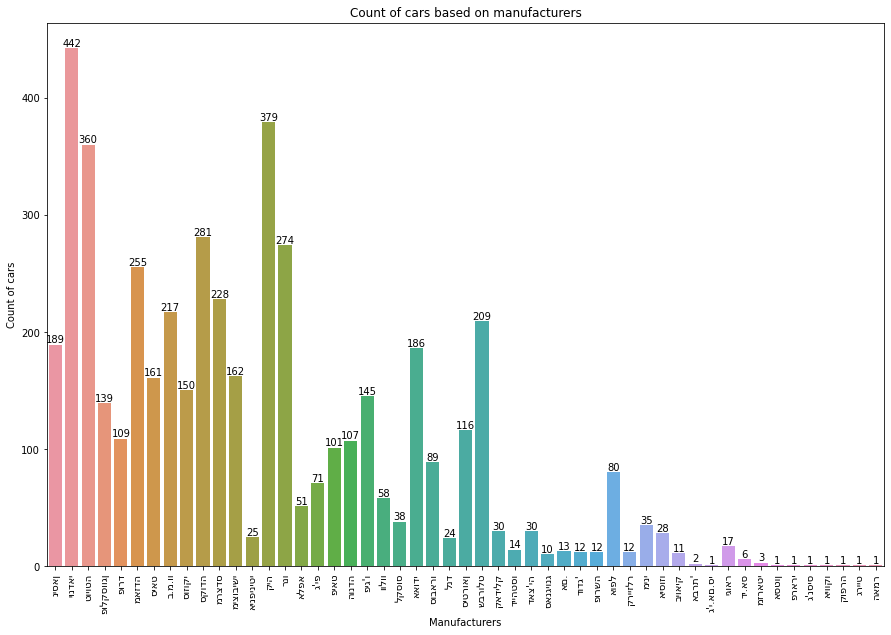

In [15]:
plt.figure(figsize = (15, 10))
plot = sns.countplot(x = 'Manufacturer', data = Cars_Data)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturers")
plt.ylabel("Count of cars")

C:\Users\asafa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


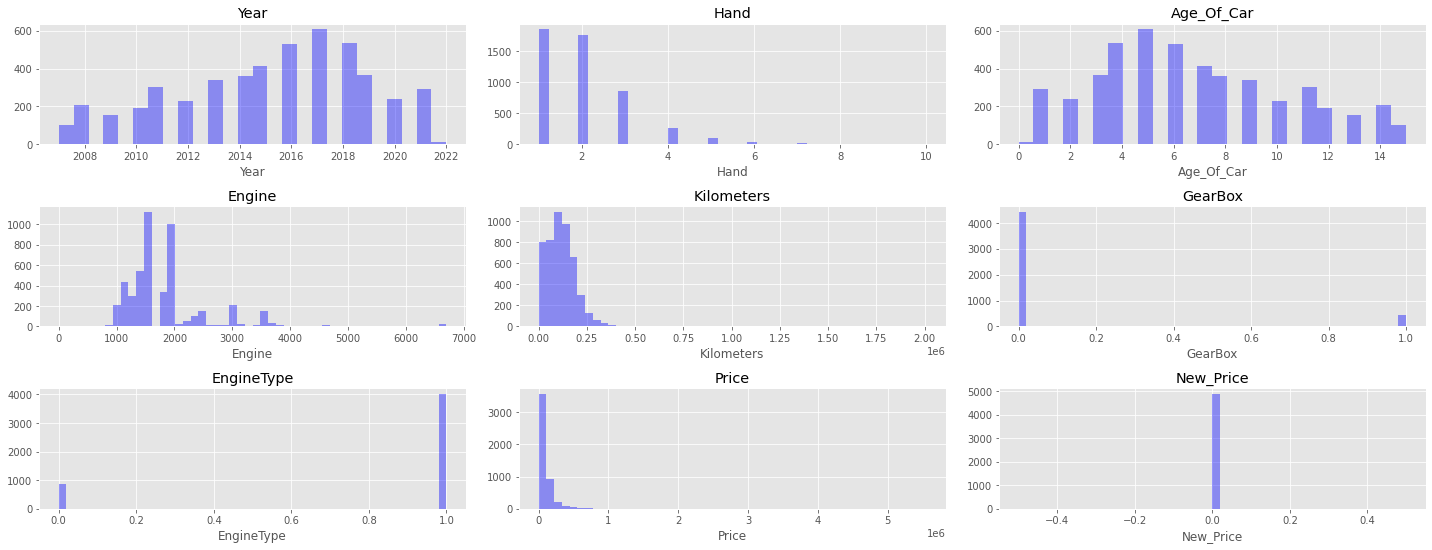

In [16]:
plt.style.use('ggplot')
#select all quantitative columns for checking the spread
numeric_columns = Cars_Data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(10,3,i+1)
                       
                     sns.distplot(Cars_Data[variable],kde=False,color='blue')
                     plt.tight_layout()
                     plt.title(variable)



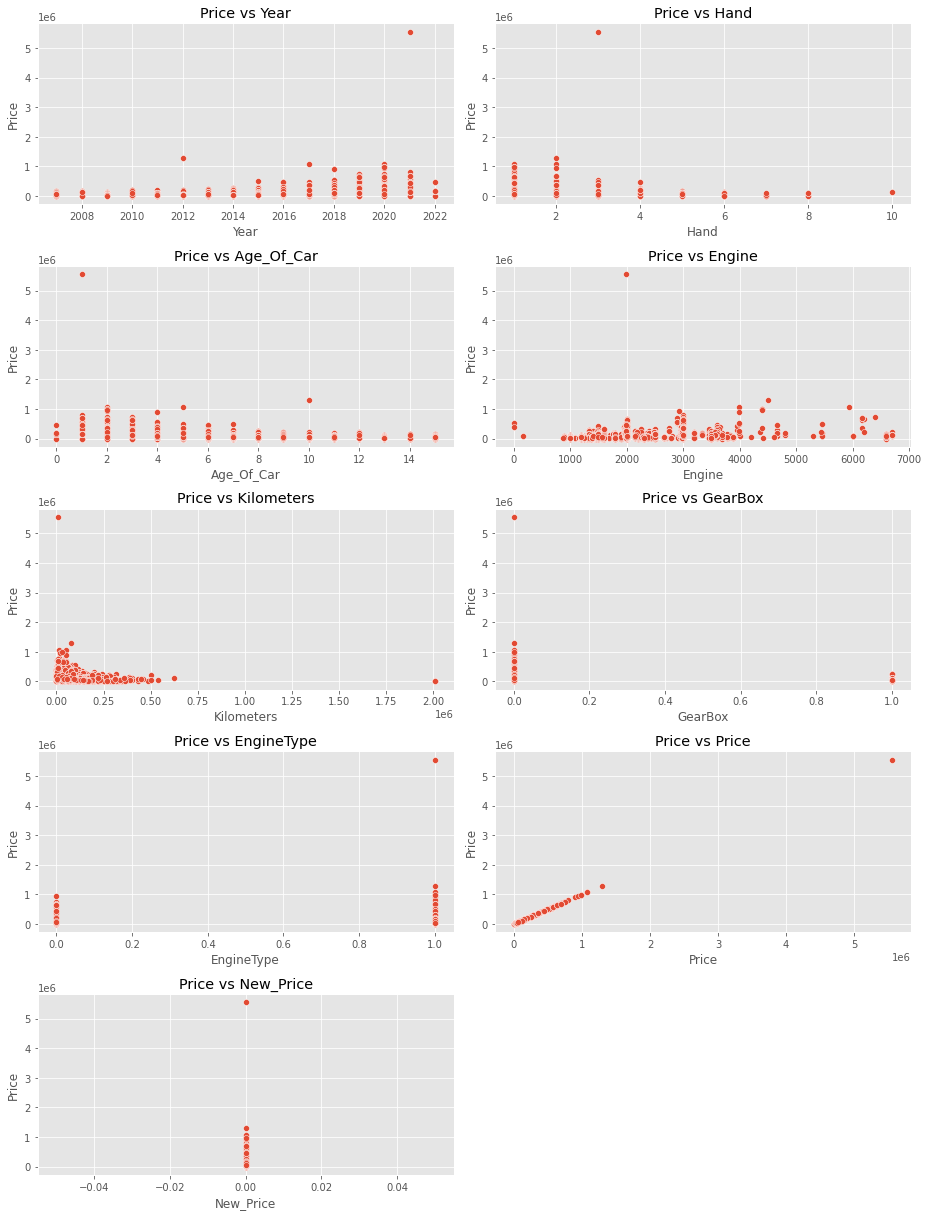

In [17]:
numeric_columns= numeric_columns = Cars_Data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=Cars_Data[variable],y=Cars_Data['Price']).set(title='Price vs '+ variable)
                     plt.tight_layout()



In [18]:
#From initial evaluation we don't see any significant linear bond.

# Section 3: Data preparation  
 final organization before machine learning
    

### Processing New Price :
 For filling the new_price columns , we going to take current prices of commons models from yad2 website for calculate the average price's decrease per year.
 


In [19]:
Cars_Data['Model'].value_counts()

סדרה       152
ספורטז'    123
קורולה     120
פיקנטו     111
אוקטביה    111
          ... 
iX3          1
C            1
אלמרה        1
גרנדלנד      1
CLK          1
Name: Model, Length: 351, dtype: int64

In [20]:
Cars_Data.loc[Cars_Data['Model']=="ספורטז'"]

,Manufacturer,Model,Year,Hand,Age_Of_Car,Engine,Kilometers,GearBox,EngineType,Price,New_Price,Full_Name
113,קיה,ספורטז',2016,2,6,1591,120000.0,0,1,79000,0,קיה ספורטז'
144,קיה,ספורטז',2021,1,1,1999,11500.0,0,1,135500,0,קיה ספורטז'
155,קיה,ספורטז',2016,1,6,1591,90000.0,0,1,92000,0,קיה ספורטז'
192,קיה,ספורטז',2014,2,8,1998,102000.0,0,1,65900,0,קיה ספורטז'
221,קיה,ספורטז',2018,3,4,1999,33000.0,0,1,109000,0,קיה ספורטז'
...,...,...,...,...,...,...,...,...,...,...,...,...
5896,קיה,ספורטז',2015,2,7,1591,135000.0,0,1,64900,0,קיה ספורטז'
5922,קיה,ספורטז',2015,2,7,1591,135000.0,0,1,64900,0,קיה ספורטז'
6082,קיה,ספורטז',2019,2,3,1999,38000.0,0,1,125000,0,קיה ספורטז'
6241,קיה,ספורטז',2020,2,2,1598,31000.0,0,0,2040,0,קיה ספורטז'


In [21]:
Cars_Data['New_Price'][Cars_Data['Model']=="ספורטז'"]=150000

In [22]:
Cars_Data[Cars_Data['Model']=="ספורטז'"].describe()

,Year,Hand,Age_Of_Car,Engine,Kilometers,GearBox,EngineType,Price,New_Price
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.0,123.000000,123.000000,123.0
mean,2016.918699,1.585366,5.081301,1759.170732,80352.560976,0.0,0.943089,92670.081301,150000.0
std,2.175096,0.626293,2.175096,214.927235,63372.787306,0.0,0.232619,27324.859080,0.0
min,2009.000000,1.000000,1.000000,1591.000000,7000.000000,0.0,0.000000,2040.000000,150000.0
25%,2016.000000,1.000000,4.000000,1591.000000,44000.000000,0.0,1.000000,79450.000000,150000.0
50%,2017.000000,2.000000,5.000000,1591.000000,79700.000000,0.0,1.000000,89900.000000,150000.0
75%,2018.000000,2.000000,6.000000,1999.000000,107000.000000,0.0,1.000000,117000.000000,150000.0
max,2021.000000,3.000000,13.000000,2656.000000,623001.000000,0.0,1.000000,135500.000000,150000.0


In [23]:
sportage_mean=(150000.0-92670.081301)/5.081301
sportage_mean

11282.527584766185

In [24]:
Cars_Data.loc[Cars_Data['Model']=="קורולה"]

,Manufacturer,Model,Year,Hand,Age_Of_Car,Engine,Kilometers,GearBox,EngineType,Price,New_Price,Full_Name
10,טויוטה,קורולה,2017,2,5,1598,84000.0,0,1,74000,0,טויוטה קורולה
36,טויוטה,קורולה,2015,2,7,1598,86500.0,0,1,65000,0,טויוטה קורולה
60,טויוטה,קורולה,2019,1,3,1798,63000.0,0,1,1684,0,טויוטה קורולה הייבריד
348,טויוטה,קורולה,2020,2,2,1798,15000.0,0,1,132000,0,טויוטה קורולה הייבריד
377,טויוטה,קורולה,2019,1,3,1798,91000.0,0,1,102900,0,טויוטה קורולה
...,...,...,...,...,...,...,...,...,...,...,...,...
6243,טויוטה,קורולה,2014,2,8,1598,138000.0,0,1,57000,0,טויוטה קורולה
6280,טויוטה,קורולה,2021,1,1,1798,1.0,0,1,145000,0,טויוטה קורולה הייבריד
6332,טויוטה,קורולה,2009,2,13,1598,97000.0,0,1,44000,0,טויוטה קורולה
6344,טויוטה,קורולה,2021,1,1,1798,1.0,0,1,145000,0,טויוטה קורולה הייבריד


In [25]:
Cars_Data['New_Price'][Cars_Data['Model']=="קורולה"]=145000

C:\Users\asafa\AppData\Local\Temp/ipykernel_4828/2158057910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cars_Data['New_Price'][Cars_Data['Model']=="קורולה"]=145000


In [26]:
Cars_Data[Cars_Data['Model']=='קורולה'].describe()

,Year,Hand,Age_Of_Car,Engine,Kilometers,GearBox,EngineType,Price,New_Price
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.0,120.0,120.000000,120.0
mean,2016.125000,1.850000,5.875000,1673.016667,102626.083333,0.0,1.0,70796.641667,145000.0
std,4.153691,1.274508,4.153691,97.252334,72164.812623,0.0,0.0,41875.990128,0.0
min,2007.000000,1.000000,1.000000,1598.000000,1.000000,0.0,1.0,1200.000000,145000.0
25%,2013.000000,1.000000,3.000000,1598.000000,50000.000000,0.0,1.0,36125.000000,145000.0
50%,2018.000000,1.000000,4.000000,1598.000000,92000.000000,0.0,1.0,74000.000000,145000.0
75%,2019.000000,2.000000,9.000000,1798.000000,152500.000000,0.0,1.0,107000.000000,145000.0
max,2021.000000,7.000000,15.000000,1800.000000,308000.000000,0.0,1.0,145000.000000,145000.0


In [27]:
corola_mean=(145000.0-70796.641667)/5.875000
corola_mean

12630.358865191489

In [28]:
Cars_Data.loc[Cars_Data['Model']=="אוקטביה"]

,Manufacturer,Model,Year,Hand,Age_Of_Car,Engine,Kilometers,GearBox,EngineType,Price,New_Price,Full_Name
31,סקודה,אוקטביה,2018,1,4,1000,129658.0,0,1,76117,0,סקודה אוקטביה
124,סקודה,אוקטביה,2013,2,9,1390,208000.0,0,1,32000,0,סקודה אוקטביה
202,סקודה,אוקטביה,2013,2,9,1390,208000.0,0,1,32000,0,סקודה אוקטביה
282,סקודה,אוקטביה,2014,5,8,1984,124000.0,0,1,97000,0,סקודה אוקטביה RS
298,סקודה,אוקטביה,2018,2,4,999,73000.0,0,1,87000,0,סקודה אוקטביה
...,...,...,...,...,...,...,...,...,...,...,...,...
6294,סקודה,אוקטביה,2016,1,6,1395,57000.0,0,1,74000,0,סקודה אוקטביה
6333,סקודה,אוקטביה,2014,1,8,1395,197000.0,0,1,45000,0,סקודה אוקטביה
6370,סקודה,אוקטביה,2015,2,7,1798,140000.0,0,1,60000,0,סקודה אוקטביה
6400,סקודה,אוקטביה,2014,2,8,1197,135000.0,0,1,46000,0,סקודה אוקטביה


In [29]:
Cars_Data['New_Price'][Cars_Data['Model']=='אוקטביה']=134000

C:\Users\asafa\AppData\Local\Temp/ipykernel_4828/3658079627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cars_Data['New_Price'][Cars_Data['Model']=='אוקטביה']=134000


In [30]:
Cars_Data[Cars_Data['Model']=='אוקטביה'].describe()

,Year,Hand,Age_Of_Car,Engine,Kilometers,GearBox,EngineType,Price,New_Price
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.0
mean,2015.900901,1.990991,6.099099,1380.531532,129517.459459,0.009009,0.936937,67684.765766,134000.0
std,2.426951,1.082888,2.426951,296.845011,56084.382610,0.094916,0.244179,32528.475761,0.0
min,2011.000000,1.000000,0.000000,999.000000,156.000000,0.000000,0.000000,22750.000000,134000.0
25%,2014.000000,1.000000,4.000000,1197.000000,108500.000000,0.000000,1.000000,44800.000000,134000.0
50%,2016.000000,2.000000,6.000000,1197.000000,135000.000000,0.000000,1.000000,60000.000000,134000.0
75%,2018.000000,3.000000,8.000000,1498.000000,160000.000000,0.000000,1.000000,83000.000000,134000.0
max,2022.000000,5.000000,11.000000,1984.000000,272000.000000,1.000000,1.000000,170000.000000,134000.0


In [31]:
octavia_mean=(134000.0-67684.765766)/6.099099
octavia_mean

10872.95586348082

In [32]:
est_var=(octavia_mean+corola_mean+sportage_mean)/3
est_var

11595.280771146165

### Filling New_Price column

In [33]:
for index, row in Cars_Data.iterrows():
    if (row["New_Price"] == 0): 
        Cars_Data.loc[index, "New_Price"] = (row["Price"] + est_var*row["Age_Of_Car"])


In [34]:
Cars_Data.head()

,Manufacturer,Model,Year,Hand,Age_Of_Car,Engine,Kilometers,GearBox,EngineType,Price,New_Price,Full_Name
0,ניסאן,מיקרה,2015,2,7,1198,102000.0,0,1,32500,113666.965398,ניסאן מיקרה
2,יונדאי,i20,2021,1,1,998,12000.0,0,1,82500,94095.280771,יונדאי i20
3,טויוטה,היילקס,2008,1,14,2494,320000.0,1,0,60000,222333.930796,טויוטה היילקס ויגו 2X4
4,פולקסווגן,גולף,2011,3,11,1390,215000.0,0,1,27000,154548.088483,פולקסווגן גולף
5,פורד,פוקוס,2008,2,14,1596,224000.0,0,1,8000,170333.930796,פורד פוקוס


#### We've got exceptional price of a new car in row 5 , so we have to check the mean of ford focus.

In [35]:
Cars_Data[Cars_Data['Model']=='פוקוס'].describe()

,Year,Hand,Age_Of_Car,Engine,Kilometers,GearBox,EngineType,Price,New_Price
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.0,33.0,33.000000,33.000000
mean,2012.454545,2.060606,9.545455,1623.727273,168404.303030,0.0,1.0,16756.060606,127438.286149
std,2.265101,0.658568,2.265101,123.828075,33176.198041,0.0,0.0,6882.163967,27489.279596
min,2008.000000,1.000000,5.000000,1498.000000,103000.000000,0.0,1.0,950.000000,58926.403856
25%,2012.000000,2.000000,9.000000,1596.000000,149000.000000,0.0,1.0,15000.000000,122357.526940
50%,2013.000000,2.000000,9.000000,1596.000000,164000.000000,0.0,1.0,17000.000000,127357.526940
75%,2013.000000,2.000000,10.000000,1596.000000,182499.000000,0.0,1.0,22900.000000,132952.807711
max,2017.000000,4.000000,14.000000,1999.000000,252000.000000,0.0,1.0,27000.000000,174833.930796


#### As we can see the average price of a new ford focus match to price list of a new car by yad2 website.

# Visualization

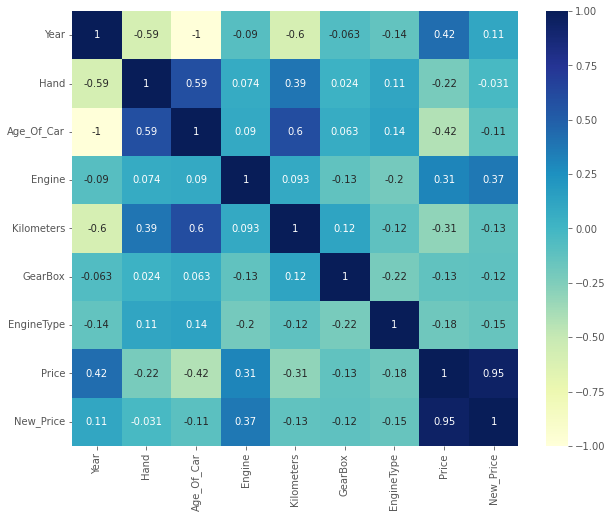

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(Cars_Data.corr(),annot=True ,cmap="YlGnBu" )
plt.show()



<AxesSubplot:title={'center':'Price based on manufacturing Year of model'}, xlabel='Year', ylabel='Price'>

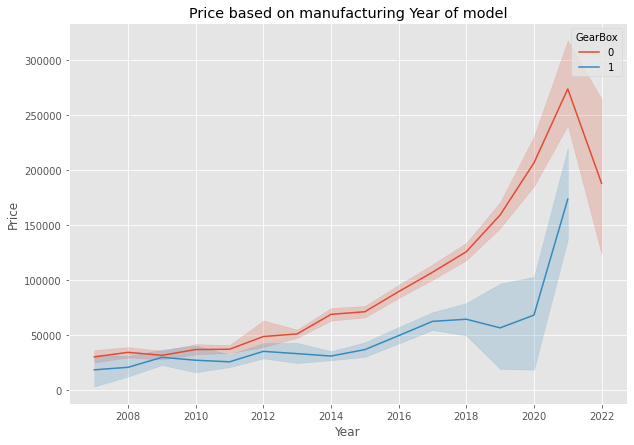

In [37]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price based on manufacturing Year of model")
sns.lineplot(x='Year', y='Price',hue='GearBox',
             data=Cars_Data)
#0-Automatic/Robotic gear
#1-Manual gear

C:\Users\asafa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


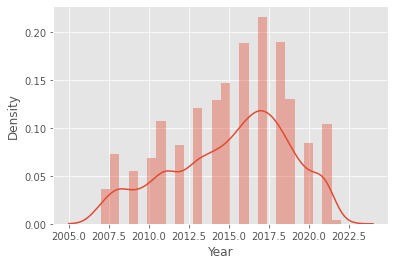

C:\Users\asafa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


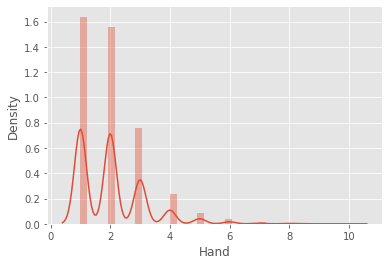

C:\Users\asafa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


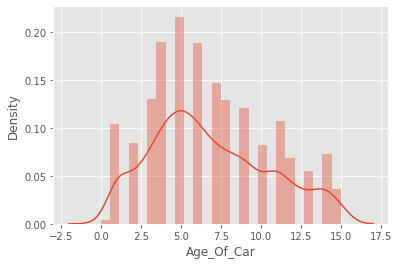

C:\Users\asafa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


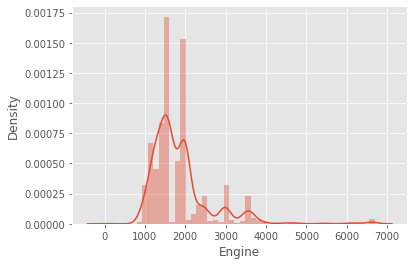

C:\Users\asafa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


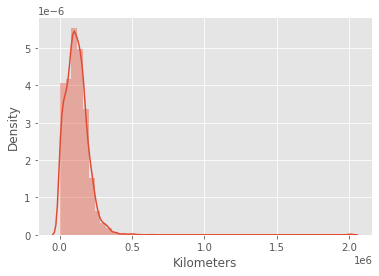

C:\Users\asafa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


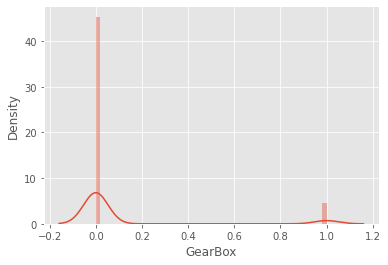

C:\Users\asafa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


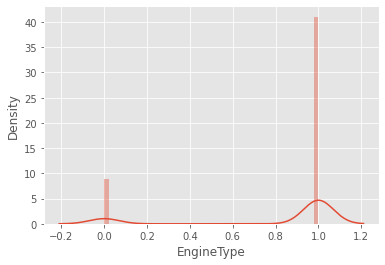

C:\Users\asafa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


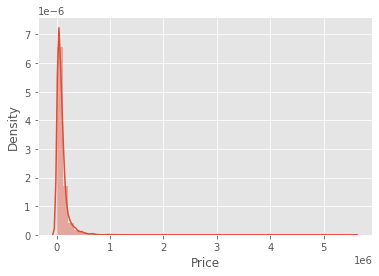

C:\Users\asafa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


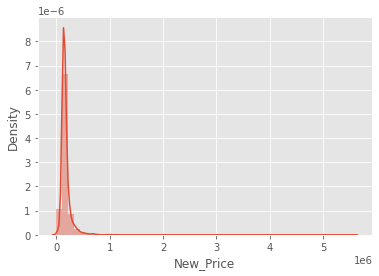

In [38]:
cols_to_log = Cars_Data.select_dtypes(include=np.number).columns.tolist()
for colname in cols_to_log:
    sns.distplot(Cars_Data[colname], kde=True)
    plt.show()

# Section 4: Machine learning 
 Linear_Regression model Random_Forest_Regressor model  and check the precision percents of the models by r2.

In [39]:
X=Cars_Data.copy()
X.drop(columns=["Price","Full_Name","Year"],axis=1,inplace=True)
X = pd.get_dummies(X,columns=['Manufacturer','Model',"GearBox","EngineType"], drop_first=True)
y = Cars_Data.Price 
X_train, X_test, y_train, y_test = train_test_split( 
X, y, train_size=0.7, test_size=0.3, random_state=100) 

In [40]:
Scaler = MinMaxScaler(feature_range=(0,1))
Scaler.fit(X_train)
X_train =Scaler.transform(X_train)
X_test = Scaler.transform(X_test)

In [41]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

-1.7821016738937276e+21

In [42]:
rf = RandomForestRegressor(n_estimators = 300)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.995308783853016

Text(0, 0.5, 'Car Price')

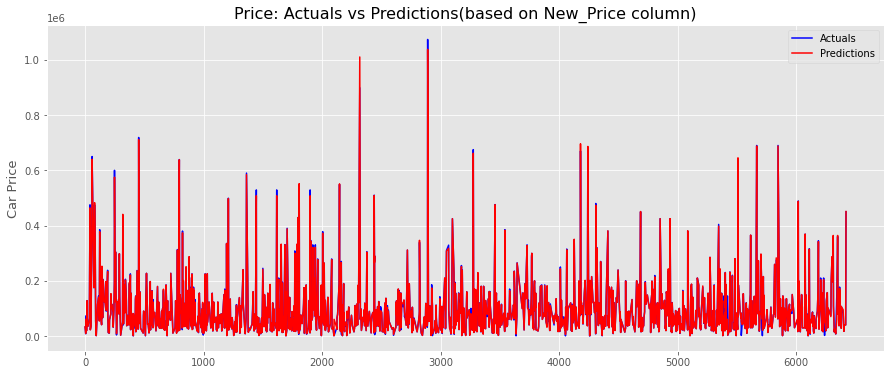

In [43]:
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_test.index,y=y_pred,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions(based on New_Price column)', fontsize=16)
ax.set_ylabel('Car Price',fontsize=13)

#### We've got too perfect prediction , so we have to find out what the causes for this result.

### We understood that our first model based only on the New_Price column

### Now we gonna make prediction that based on mechanical parameters and  car's brand and models.

In [44]:
X1=X
X1.drop(columns=["New_Price"],axis=1,inplace=True)
y1 = y 
X_train1, X_test1, y_train1, y_test1 = train_test_split( 
X1, y1, train_size=0.7, test_size=0.3, random_state=100) 
linearRegression.fit(X_train1, y_train1)
y_pred1 = linearRegression.predict(X_test1)
r2_score(y_test1, y_pred1)

0.7748594377019218

In [45]:
rf = RandomForestRegressor(n_estimators = 300)
rf.fit(X_train1, y_train1)
y_pred1 = rf.predict(X_test1)
r2_score(y_test1, y_pred1)

0.8209557656227688

Text(0, 0.5, 'Car Price')

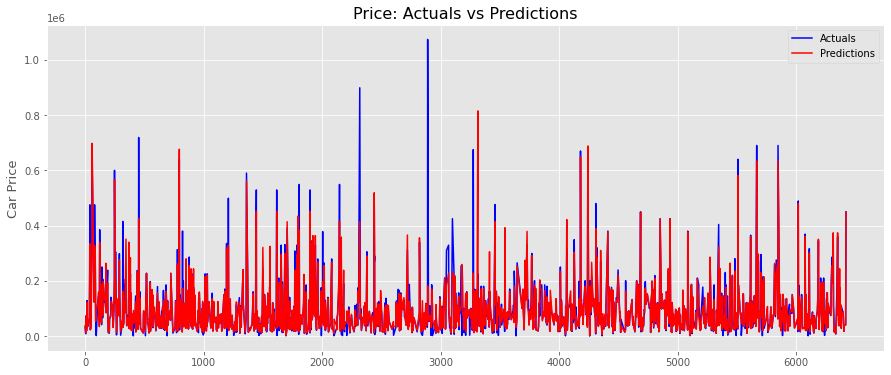

In [46]:
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=y_test1.index,y=y_test1,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_test1.index,y=y_pred1,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions', fontsize=16)
ax.set_ylabel('Car Price',fontsize=13)